In [1]:
%matplotlib inline
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import sklearn.linear_model as lm

In [2]:
training = pd.read_csv('Data/TrainingWiDS2021.csv', index_col=0)
training

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.0,0,0,0,0,0,0,0,0
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
130155,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,Accident & Emergency,...,163.0,163.0,0,0,0,0,0,0,0,1
130156,222562,170,81.0,24.408579,0,Caucasian,M,185.4,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('Data/UnlabeledWiDS2021.csv', index_col=0)
test

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,143750,10140,36,37.5,0,Caucasian,F,170.1,Floor,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10231,143813,10140,61,32.1,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10232,137126,10140,74,22.7,0,Caucasian,F,165.1,Step-Down Unit (SDU),Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10233,135652,10140,90,19.9,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0


# Diagnosis = 0

In [4]:
solution = pd.read_csv('Data/SolutionTemplateWiDS2021.csv', index_col=0)

In [5]:
solution['diabetes_mellitus']=0

In [6]:
solution

,diabetes_mellitus
encounter_id,
135000,0
135001,0
135002,0
135003,0
135004,0
...,...
145996,0
145997,0
145998,0


In [7]:
solution.to_csv('Data/results.csv')

# Diagnosis = elective_surgery

In [8]:
test['diabetes_mellitus']=test['elective_surgery']
test

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,143750,10140,36,37.5,0,Caucasian,F,170.1,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
10231,143813,10140,61,32.1,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
10232,137126,10140,74,22.7,0,Caucasian,F,165.1,Step-Down Unit (SDU),Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
10233,135652,10140,90,19.9,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


In [9]:
results = test[['encounter_id','diabetes_mellitus']].set_index('encounter_id')
results.to_csv('Data/results.csv')

# Age logistic regression

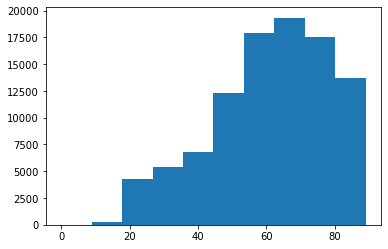

In [10]:
plt.hist(training['age'][training['diabetes_mellitus']==0]);

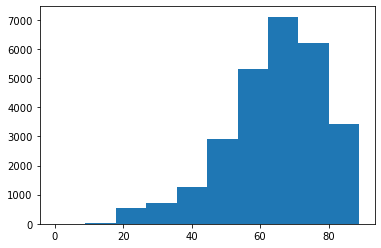

In [11]:
plt.hist(training['age'][training['diabetes_mellitus']==1]);

In [12]:
training['age'] = training['age'].fillna(0)

In [13]:
has_diabetes = training[training['diabetes_mellitus']==1].sample(25000)
no_diabetes = training[training['diabetes_mellitus']==0].sample(25000)

In [14]:
balanced = pd.concat([has_diabetes,no_diabetes])
balanced

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
27060,190307,119,78.0,31.111111,0,Caucasian,F,150.0,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,1,0,0,0,1
3323,238955,118,45.0,46.825487,0,African American,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,1
58525,200415,176,69.0,38.754336,0,Caucasian,F,167.6,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,1,0,0,0,1
72597,201294,13,76.0,26.235810,0,Other/Unknown,M,170.2,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,1
66731,191543,19,81.0,28.114731,0,Caucasian,F,157.0,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122464,158085,175,75.0,26.481481,1,Caucasian,M,180.0,Operating Room,Operating Room / Recovery,...,NaN,NaN,0,0,0,0,0,0,0,0
78431,192400,196,50.0,27.800688,0,Caucasian,M,182.9,NaN,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
116407,210616,86,56.0,30.879432,0,Caucasian,M,147.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
104320,215808,120,76.0,20.800872,0,Caucasian,F,184.1,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


In [15]:
training = balanced
clf = lm.LogisticRegression()
clf.fit(training[['age']], training['diabetes_mellitus'])
test['diabetes_mellitus']=clf.predict(test[['age']])

In [17]:
X_test = np.linspace(0,100,300)

In [18]:
clf.predict(X_test[:,None])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

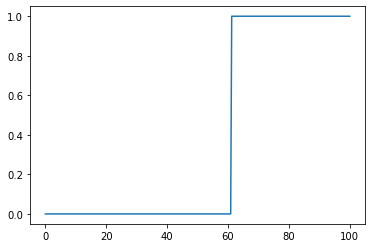

In [19]:
plt.plot(X_test, clf.predict(X_test[:,None]));

In [20]:
results = test[['encounter_id','diabetes_mellitus']].set_index('encounter_id')
results.to_csv('Data/results.csv')

# Age + BMI logistic regression

In [21]:
balanced['bmi'] = pd.to_numeric(balanced['bmi'])
test['bmi'] = pd.to_numeric(test['bmi'])

In [22]:
balanced['bmi'] = balanced['bmi'].fillna(0)
test['bmi'] = test['bmi'].fillna(0)

In [23]:
clf2 = lm.LogisticRegression()
clf2.fit(training[['age','bmi']], training['diabetes_mellitus'])
test['diabetes_mellitus']=clf2.predict(test[['age','bmi']])

In [24]:
results = test[['encounter_id','diabetes_mellitus']].set_index('encounter_id')
results.to_csv('Data/results.csv')

# Age + BMI kNN classifier

In [25]:
import sklearn.neighbors as nb

In [26]:
clf3 = nb.KNeighborsClassifier()
clf3.fit(training[['age','bmi']], training['diabetes_mellitus'])
test['diabetes_mellitus']=clf3.predict(test[['age','bmi']])

In [27]:
results = test[['encounter_id','diabetes_mellitus']].set_index('encounter_id')
results.to_csv('Data/results.csv')

# Age, BMI, Glucose Apache kNN

In [28]:
balanced['glucose_apache'] = balanced['glucose_apache'].fillna(0)
test['glucose_apache'] = test['glucose_apache'].fillna(0)

In [29]:
clf3 = nb.KNeighborsClassifier()
clf3.fit(training[['age','bmi','glucose_apache']], training['diabetes_mellitus'])
test['diabetes_mellitus']=clf3.predict(test[['age','bmi','glucose_apache']])

In [30]:
results = test[['encounter_id','diabetes_mellitus']].set_index('encounter_id')
results.to_csv('Data/results.csv')

# Age, BMI, Glucose Apache logistic regression

In [31]:
clf2 = lm.LogisticRegression()
clf2.fit(training[['age','bmi','glucose_apache']], training['diabetes_mellitus'])
test['diabetes_mellitus']=clf2.predict(test[['age','bmi','glucose_apache']])

In [32]:
results = test[['encounter_id','diabetes_mellitus']].set_index('encounter_id')
results.to_csv('Data/results.csv')

# Decision Tree

In [33]:
import sklearn.tree as tree
import sklearn.preprocessing as pp

In [34]:
clf = tree.DecisionTreeClassifier()
clf.fit(training[['age','bmi','glucose_apache']], training['diabetes_mellitus'])
test['diabetes_mellitus']=clf.predict(test[['age','bmi','glucose_apache']])

In [35]:
results = test[['encounter_id','diabetes_mellitus']].set_index('encounter_id')
results.to_csv('Data/results.csv')

In [36]:
trainingX = training.drop(columns=['diabetes_mellitus'])
testX = test.drop(columns=['diabetes_mellitus'])

In [37]:
training['ethnicity'] = training['ethnicity'].fillna("Missing")
test['ethnicity'] = test['ethnicity'].fillna("Missing")

In [38]:
# TODO: figure out how one-hot encoding works!
enc = pp.OneHotEncoder()
training['ethnicity']=enc.fit_transform(training[['ethnicity']])

In [39]:
clf.fit(trainingX, training['diabetes_mellitus'])
test['diabetes_mellitus']=clf.predict(testX)

ValueError: could not convert string to float: 'Caucasian'